In [1]:
#Import all the Python packages required for the course ...
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import mapclassify
from mapclassify import Quantiles, UserDefined
from matplotlib import cm
import numpy as np
from pathlib import Path
%matplotlib inline
BASE = Path('.').resolve() #Set path

In [6]:
lfb = pd.read_csv(r'data/csv/lfb_2009_2020.csv')
lfb.head()

,incident_number,cal_year,type_of_incident,cost_gbp,final_description,animal_group_parent,property_category,ward_code,ward,stn_ground_name,easting,northing
0,D1,2009,Special Service,510.0,"DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15",Dog,Dwelling,E05011467,Crystal Palace & Upper Norwood,Norbury,532350,170050
1,F2,2009,Special Service,255.0,"ASSIST RSPCA WITH FOX TRAPPED,B15",Fox,Outdoor Structure,E05000169,Woodside,Woodside,534750,167550
2,D3,2009,Special Service,255.0,"DOG CAUGHT IN DRAIN,B15",Dog,Outdoor Structure,E05000558,Carshalton Central,Wallington,528050,164950
3,H4,2009,Special Service,255.0,"HORSE TRAPPED IN LAKE,J17",Horse,Non Residential,E05000330,Harefield,Ruislip,504650,190650
4,R5,2009,Special Service,255.0,"RABBIT TRAPPED UNDER SOFA,B15",Rabbit,Dwelling,E05000310,Gooshays,Harold Hill,554650,192350


In [7]:
lfb_gdf  = gpd.GeoDataFrame(lfb,
                              geometry=gpd.points_from_xy(lfb.easting, 
                                                          lfb.northing), crs = 'EPSG:27700')

In [8]:
lfb_gdf.head()

,incident_number,cal_year,type_of_incident,cost_gbp,final_description,animal_group_parent,property_category,ward_code,ward,stn_ground_name,easting,northing,geometry
0,D1,2009,Special Service,510.0,"DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15",Dog,Dwelling,E05011467,Crystal Palace & Upper Norwood,Norbury,532350,170050,POINT (532350.000 170050.000)
1,F2,2009,Special Service,255.0,"ASSIST RSPCA WITH FOX TRAPPED,B15",Fox,Outdoor Structure,E05000169,Woodside,Woodside,534750,167550,POINT (534750.000 167550.000)
2,D3,2009,Special Service,255.0,"DOG CAUGHT IN DRAIN,B15",Dog,Outdoor Structure,E05000558,Carshalton Central,Wallington,528050,164950,POINT (528050.000 164950.000)
3,H4,2009,Special Service,255.0,"HORSE TRAPPED IN LAKE,J17",Horse,Non Residential,E05000330,Harefield,Ruislip,504650,190650,POINT (504650.000 190650.000)
4,R5,2009,Special Service,255.0,"RABBIT TRAPPED UNDER SOFA,B15",Rabbit,Dwelling,E05000310,Gooshays,Harold Hill,554650,192350,POINT (554650.000 192350.000)


<AxesSubplot:>

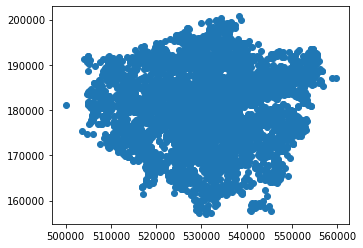

In [9]:
lfb_gdf.plot()

In [10]:
utla_2019 = gpd.read_file('data/shp/London_2019/London_and_surrounding_UTLAs.shp')

<AxesSubplot:>

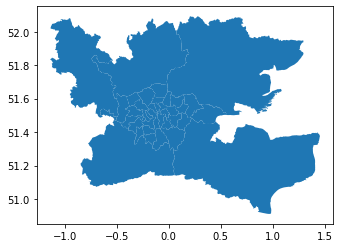

In [11]:
utla_2019.plot()

In [12]:
utla_2019.head()

,ctyua19cd,ctyua19nm,geometry
0,E06000034,Thurrock,"POLYGON ((0.39195 51.56573, 0.39198 51.56530, ..."
1,E06000039,Slough,"POLYGON ((-0.62395 51.53779, -0.62379 51.53777..."
2,E10000002,Buckinghamshire,"POLYGON ((-0.95011 52.07975, -0.95007 52.07975..."
3,E10000012,Essex,"POLYGON ((0.68347 52.08695, 0.68367 52.08692, ..."
4,E10000015,Hertfordshire,"POLYGON ((-0.15731 52.08035, -0.15727 52.08035..."


<AxesSubplot:>

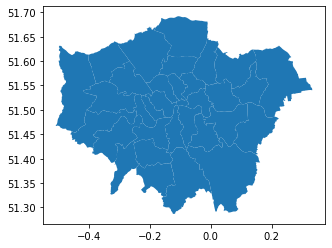

In [13]:
london_utla = utla_2019.loc[utla_2019['ctyua19cd'].str.startswith('E09')]
london_utla.plot()

In [14]:
london_utla = london_utla.assign(group=1)
london_boundary = london_utla.dissolve(by = 'group')
london_utla.head()

,ctyua19cd,ctyua19nm,geometry,group
7,E09000001,City of London,"POLYGON ((-0.09671 51.52319, -0.09670 51.52316...",1
8,E09000002,Barking and Dagenham,"POLYGON ((0.14807 51.59640, 0.14806 51.59635, ...",1
9,E09000003,Barnet,"POLYGON ((-0.19990 51.67017, -0.19970 51.66986...",1
10,E09000004,Bexley,"POLYGON ((0.15795 51.50876, 0.16006 51.50871, ...",1
11,E09000005,Brent,"POLYGON ((-0.26476 51.59818, -0.26428 51.59778...",1


<AxesSubplot:>

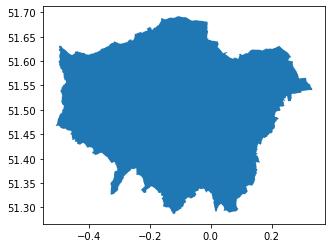

In [15]:
london_boundary.plot()

In [16]:
lfb_london = gpd.overlay(lfb_gdf, london_boundary, how='intersection')

<ipython-input-16-d4f141cac5ac>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: EPSG:4326

  lfb_london = gpd.overlay(lfb_gdf, london_boundary, how='intersection')
D:\gis-library\script\Conda\envs\arcgis\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
D:\gis-library\script\Conda\envs\arcgis\lib\site-packages\geopandas\geoseries.py:207: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
D:\gis-library\script\Conda\envs\arcgis\lib\site-packages\geo

In [17]:
london_boundary.crs == lfb_gdf.crs

False

In [18]:
london_boundary = london_boundary.to_crs(epsg=27700)

In [19]:
london_boundary.crs == lfb_gdf.crs

True

In [20]:
lfb_gdf = gpd.overlay(lfb_gdf, london_boundary, how='intersection')

In [21]:
lfb_gdf.head()

,incident_number,cal_year,type_of_incident,cost_gbp,final_description,animal_group_parent,property_category,ward_code,ward,stn_ground_name,easting,northing,ctyua19cd,ctyua19nm,geometry
0,D1,2009,Special Service,510.0,"DOG WITH JAW TRAPPED IN MAGAZINE RACK,B15",Dog,Dwelling,E05011467,Crystal Palace & Upper Norwood,Norbury,532350,170050,E09000001,City of London,POINT (532350.000 170050.000)
1,F2,2009,Special Service,255.0,"ASSIST RSPCA WITH FOX TRAPPED,B15",Fox,Outdoor Structure,E05000169,Woodside,Woodside,534750,167550,E09000001,City of London,POINT (534750.000 167550.000)
2,D3,2009,Special Service,255.0,"DOG CAUGHT IN DRAIN,B15",Dog,Outdoor Structure,E05000558,Carshalton Central,Wallington,528050,164950,E09000001,City of London,POINT (528050.000 164950.000)
3,H4,2009,Special Service,255.0,"HORSE TRAPPED IN LAKE,J17",Horse,Non Residential,E05000330,Harefield,Ruislip,504650,190650,E09000001,City of London,POINT (504650.000 190650.000)
4,R5,2009,Special Service,255.0,"RABBIT TRAPPED UNDER SOFA,B15",Rabbit,Dwelling,E05000310,Gooshays,Harold Hill,554650,192350,E09000001,City of London,POINT (554650.000 192350.000)


<AxesSubplot:>

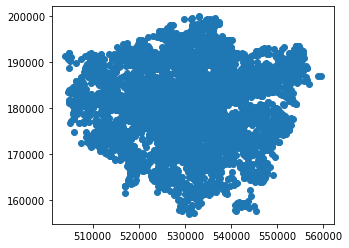

In [22]:
lfb_gdf.plot()

In [23]:
msoa_london = gpd.read_file('data/shp/MSOA_2011_london/MSOA_2011_BSC_London.shp')

<AxesSubplot:>

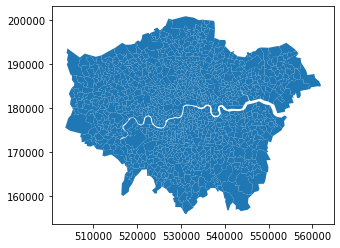

In [26]:
msoa_london.plot()

In [ ]:
ef sjoin_nearest(
    left_df: GeoDataFrame,
    right_df: GeoDataFrame,
    how: str = "inner",
    max_distance: Optional[float] = None,
    lsuffix: str = "left",
    rsuffix: str = "right",
    distance_col: Optional[str] = None,
) -> GeoDataFrame:

In [27]:
msoa_london.head()

,MSOA11CD,geometry
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18..."
1,E02000002,"POLYGON ((549000.726 190873.464, 549120.966 18..."
2,E02000003,"POLYGON ((548954.517 189063.241, 549085.611 18..."
3,E02000004,"POLYGON ((551943.782 186027.614, 551670.827 18..."
4,E02000005,"POLYGON ((549418.680 187442.412, 548983.438 18..."


In [28]:
msoa_london.crs == lfb_gdf.crs

True

In [34]:
london_msoa_lfb = gpd.sjoin(msoa_london, lfb_gdf, how = 'inner')

In [35]:
london_msoa_lfb.head()

,MSOA11CD,geometry,index_right,incident_number,cal_year,type_of_incident,cost_gbp,final_description,animal_group_parent,property_category,ward_code,ward,stn_ground_name,easting,northing,ctyua19cd,ctyua19nm
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",5107,C5370,2018,Special Service,333.0,SMALL ANIMAL RESCUE CAT FALLEN FROM SECOND FLO...,Cat,Dwelling,E05000367,BUNHILL,Dowgate,531850,181850,E09000001,City of London
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",4195,B4429,2016,Special Service,326.0,ASSIST RSPCA WITH TRAPPED BIRDS,Bird,Non Residential,E05009303,DOWGATE,Dowgate,532650,180850,E09000001,City of London
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",6053,B6358,2019,Special Service,339.0,BIRD TRAPPED UNDER LEDGE ON 7TH FLOOR,Bird,Non Residential,E05009291,BILLINGSGATE,Dowgate,533150,180850,E09000001,City of London
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",1697,B1784,2011,Special Service,520.0,BIRD TRAPPED IN WIRE,Bird,Outdoor,E05009303,Dowgate,Dowgate,532550,180850,E09000001,City of London
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",5323,B5589,2018,Special Service,333.0,SEAGULL TRAPPED BEHIND DOOR,Bird,Non Residential,E05009296,CANDLEWICK,Dowgate,532850,180850,E09000001,City of London


<AxesSubplot:>

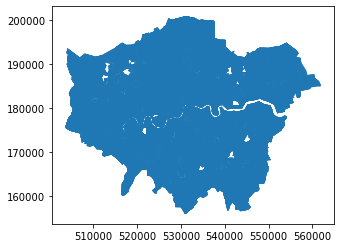

In [36]:
london_msoa_lfb.plot()

In [37]:
lfb_msoa_symmetric_difference = gpd.overlay(lfb_gdf, london_msoa_lfb, how='symmetric_difference',keep_geom_type=True)

In [38]:
lfb_msoa_symmetric_difference

,incident_number_1,cal_year_1,type_of_incident_1,cost_gbp_1,final_description_1,animal_group_parent_1,property_category_1,ward_code_1,ward_1,stn_ground_name_1,...,animal_group_parent_2,property_category_2,ward_code_2,ward_2,stn_ground_name_2,easting_2,northing_2,ctyua19cd_2,ctyua19nm_2,geometry
0,D33,2009.0,Special Service,255.0,"DOG TRAPPED IN DRAIN UNDER BANDSTAND,B15",Dog,Non Residential,E05000348,Chiswick Homefields,Chiswick,...,None,None,None,None,None,NaN,NaN,None,None,POINT (521450.000 176750.000)
1,D54,2009.0,Special Service,255.0,"DOG STUCK IN MUD ON SHORELINE ,J15",Dog,Outdoor,E05000075,Erith,Erith,...,None,None,None,None,None,NaN,NaN,None,None,POINT (551650.000 178350.000)
2,C71,2009.0,Special Service,1275.0,"KITTEN STUCK IN MUD,J15",Cat,Outdoor,E05000075,Erith,Erith,...,None,None,None,None,None,NaN,NaN,None,None,POINT (551250.000 178550.000)
3,D218,2009.0,Special Service,260.0,"DOG CAUGHT IN BRAMBLES,B15",Dog,Outdoor,E05000593,Chingford Green,Chingford,...,None,None,None,None,None,NaN,NaN,None,None,POINT (540250.000 194850.000)
4,D1087,2010.0,Special Service,260.0,DOG IN RIVER ALONG TOW PATH,Dog,Outdoor,E05000524,Kew,Richmond,...,None,None,None,None,None,NaN,NaN,None,None,POINT (518850.000 177750.000)
5,B1122,2010.0,Special Service,260.0,BIRD TRAPPED BETWEEN ROOF TILES,Bird,Outdoor Structure,E05000349,Chiswick Riverside,Chiswick,...,None,None,None,None,None,NaN,NaN,None,None,POINT (520150.000 176650.000)
6,D1269,2011.0,Special Service,NaN,DOG IN DISTRESS IN RIVER,Dog,Outdoor,E05000416,Bishop's,Lambeth,...,None,None,None,None,None,NaN,NaN,None,None,POINT (530450.000 179050.000)
7,D1925,2012.0,Special Service,260.0,DOG TRAPPED ON MUD BANK OF RIVER THAMES,Dog,Outdoor,E05000362,Isleworth,Heston,...,None,None,None,None,None,NaN,NaN,None,None,POINT (516650.000 175850.000)
8,D2074,2012.0,Special Service,260.0,DOG IN DITCH,Dog,Outdoor,E05000524,Kew,Richmond,...,None,None,None,None,None,NaN,NaN,None,None,POINT (518150.000 177150.000)
9,D2178,2012.0,Special Service,260.0,DOG IN RIVER LEVEL 2 LINE OPS,Dog,Outdoor,E05000039,Thames,Barking,...,None,None,None,None,None,NaN,NaN,None,None,POINT (544850.000 182950.000)


<AxesSubplot:>

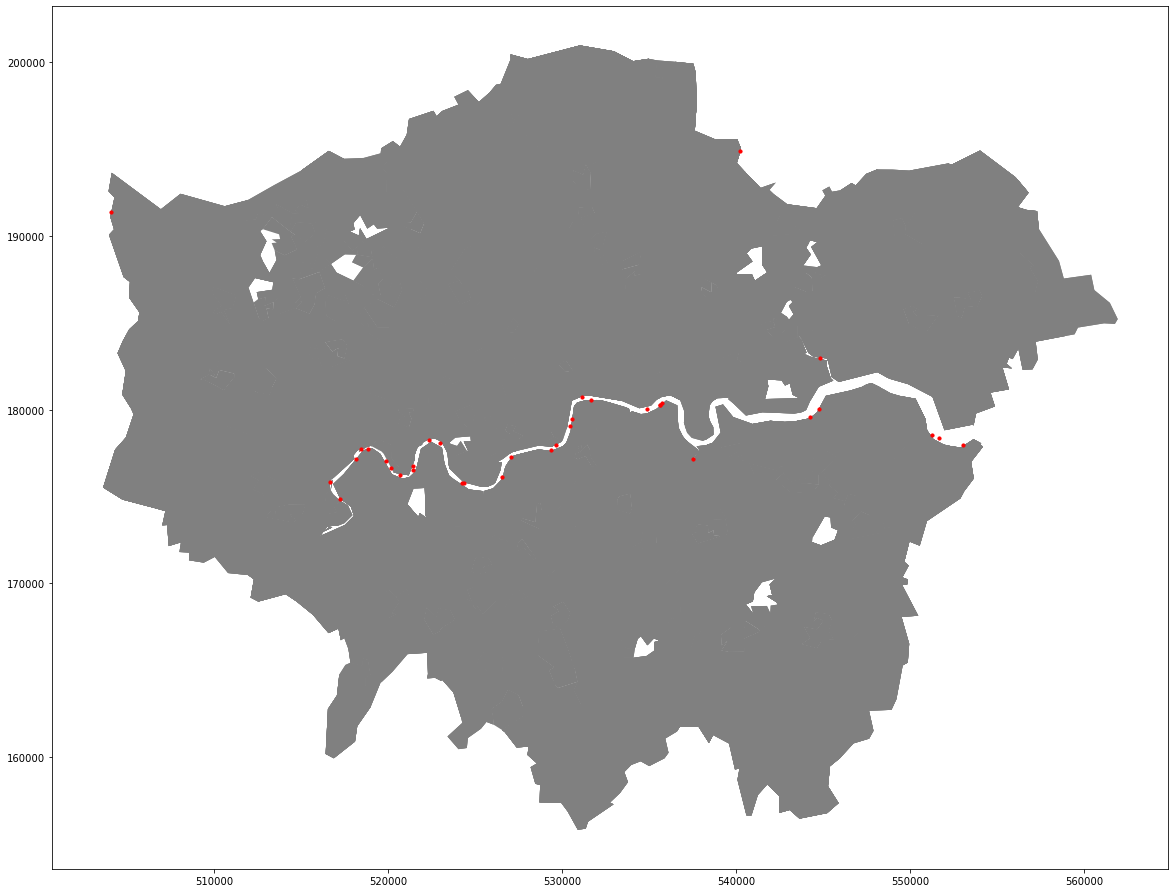

In [39]:
f, ax = plt.subplots(figsize=(20,20))
london_msoa_lfb.plot(ax=ax, color='grey')
lfb_msoa_symmetric_difference.plot(ax=ax, marker='o', color='red', markersize=10)

In [40]:
lfb_msoa_stats = london_msoa_lfb.groupby('MSOA11CD').cost_gbp.agg(['count', 'sum']).reset_index().rename(columns={'count':'n_cases','sum' : 'total_cost'})

In [41]:
lfb_msoa_stats.head()

,MSOA11CD,n_cases,total_cost
0,E02000001,13,4083.0
1,E02000002,6,1926.0
2,E02000003,11,4779.0
3,E02000004,7,2917.0
4,E02000005,5,1411.0


In [42]:
lfb_msoa_stats['cost_per_incident'] = lfb_msoa_stats.total_cost/lfb_msoa_stats.n_cases

In [43]:
lfb_msoa_stats.head()

,MSOA11CD,n_cases,total_cost,cost_per_incident
0,E02000001,13,4083.0,314.076923
1,E02000002,6,1926.0,321.000000
2,E02000003,11,4779.0,434.454545
3,E02000004,7,2917.0,416.714286
4,E02000005,5,1411.0,282.200000


In [44]:
msoa_lfb = pd.merge(msoa_london, lfb_msoa_stats, on = 'MSOA11CD', how = 'left')

In [45]:
msoa_lfb.head()

,MSOA11CD,geometry,n_cases,total_cost,cost_per_incident
0,E02000001,"POLYGON ((532946.065 181894.827, 533410.692 18...",13.0,4083.0,314.076923
1,E02000002,"POLYGON ((549000.726 190873.464, 549120.966 18...",6.0,1926.0,321.000000
2,E02000003,"POLYGON ((548954.517 189063.241, 549085.611 18...",11.0,4779.0,434.454545
3,E02000004,"POLYGON ((551943.782 186027.614, 551670.827 18...",7.0,2917.0,416.714286
4,E02000005,"POLYGON ((549418.680 187442.412, 548983.438 18...",5.0,1411.0,282.200000


In [46]:
msoa_lfb.to_file('data/shp/msoa_lfb.shp')

D:\gis-library\script\Conda\envs\arcgis\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
<ipython-input-46-e57e0cb72e82>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  msoa_lfb.to_file('data/shp/msoa_lfb.shp')


<AxesSubplot:>

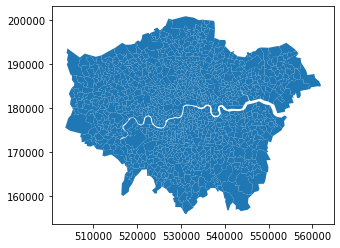

In [47]:
msoa_lfb.plot()

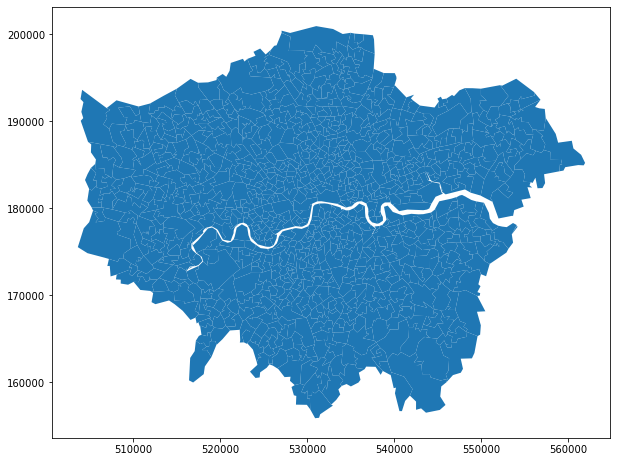

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(ax=ax)

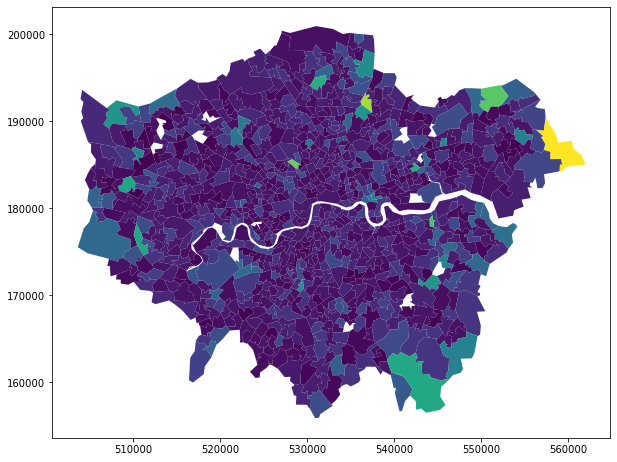

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = msoa_lfb.plot(column='cost_per_incident', ax=ax)

<AxesSubplot:>

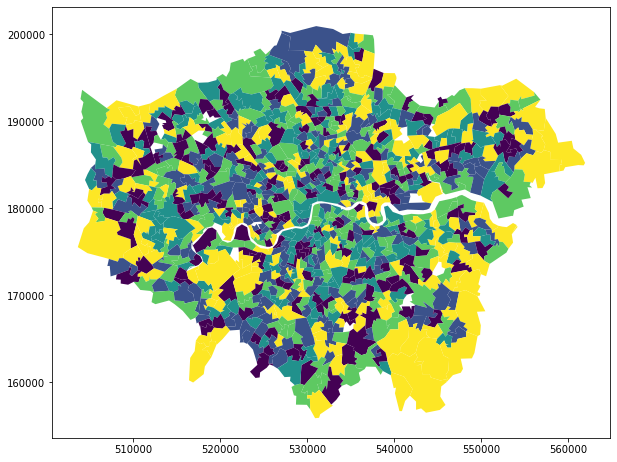

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, ax=ax)

<AxesSubplot:>

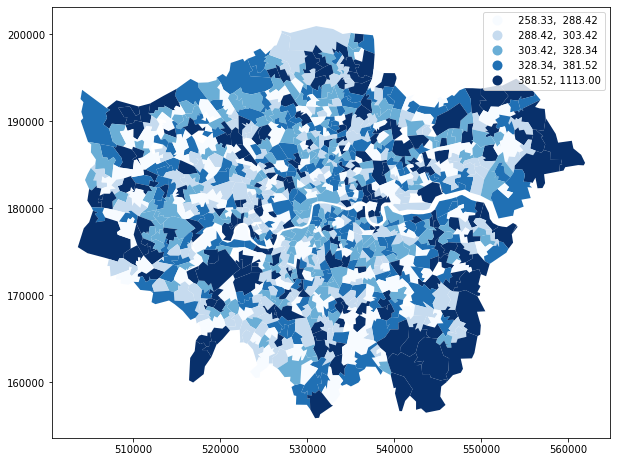

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column='cost_per_incident', scheme='Quantiles',k = 5, cmap = 'Blues', legend =True, ax=ax)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

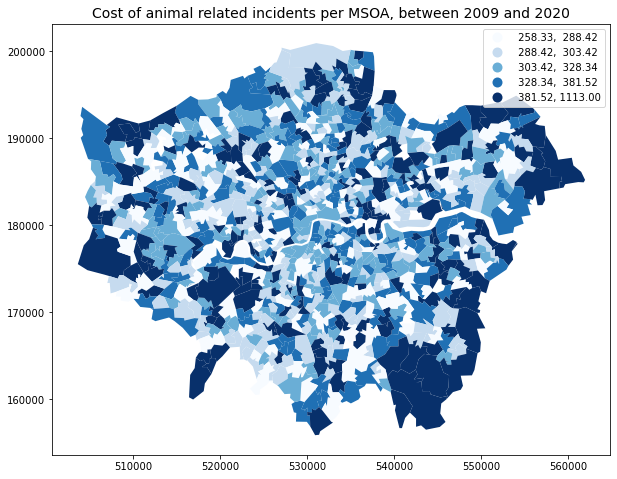

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'cost_per_incident', ax = ax, scheme='QUANTILES', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

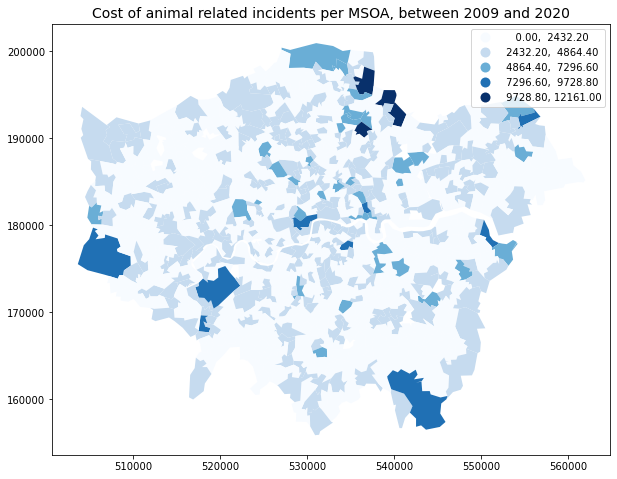

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
msoa_lfb.plot(column= 'total_cost', ax = ax, scheme='equal_interval', k = 5, cmap='Blues', legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

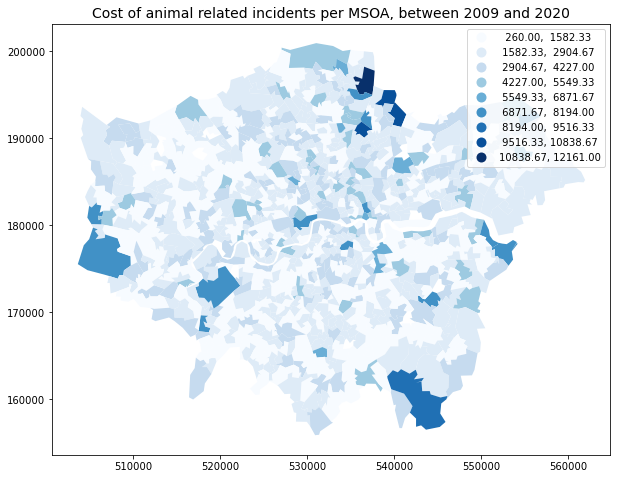

In [54]:
ax = msoa_lfb.dropna().plot(column='total_cost', cmap='Blues', figsize=(10,10), scheme='equal_interval', k=9, legend=True)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

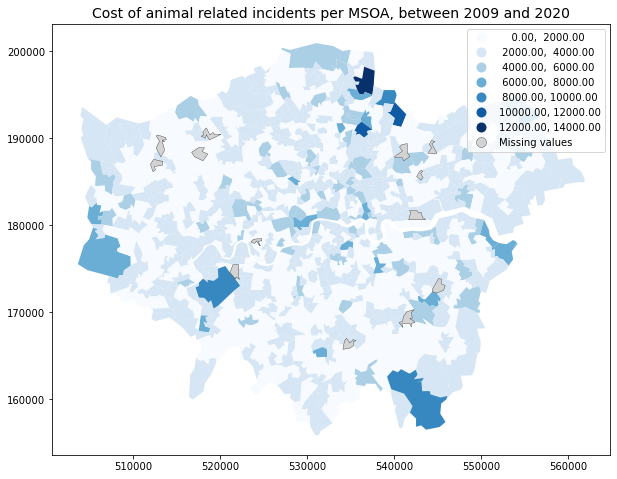

In [55]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', figsize=(10,10), scheme="User_Defined", legend=True, 
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]}, 
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},)
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

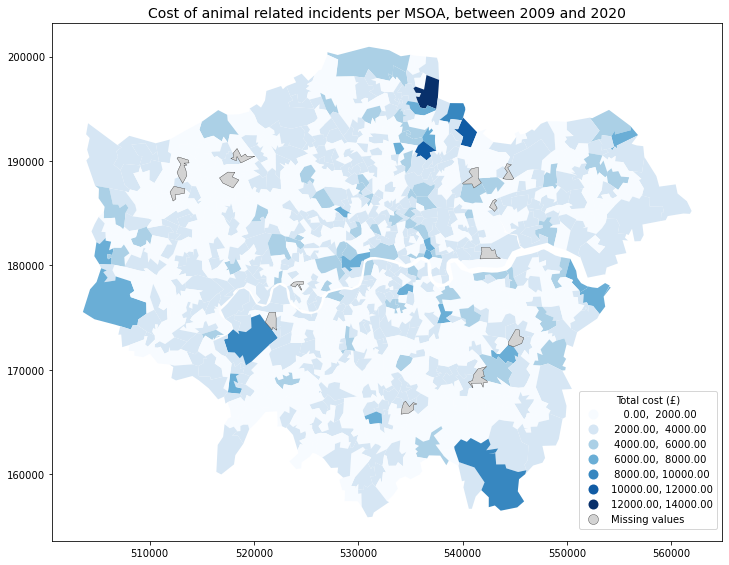

In [56]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', figsize=(12,10), scheme="User_Defined", legend=True, 
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.3), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Cost of animal related incidents per MSOA, between 2009 and 2020')

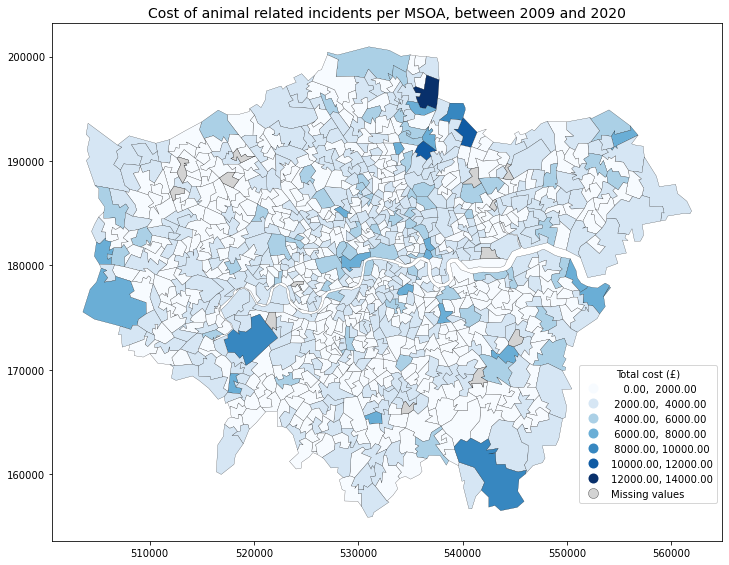

In [57]:
ax = msoa_lfb.plot(column='total_cost', cmap='Blues', edgecolor = 'k', 
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[2000, 4000, 6000, 8000, 10000, 12000, 14000]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.35), 'title':'Total cost (£)'})
plt.title('Cost of animal related incidents per MSOA, between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Average cost of animal related incidents between 2009 and 2020')

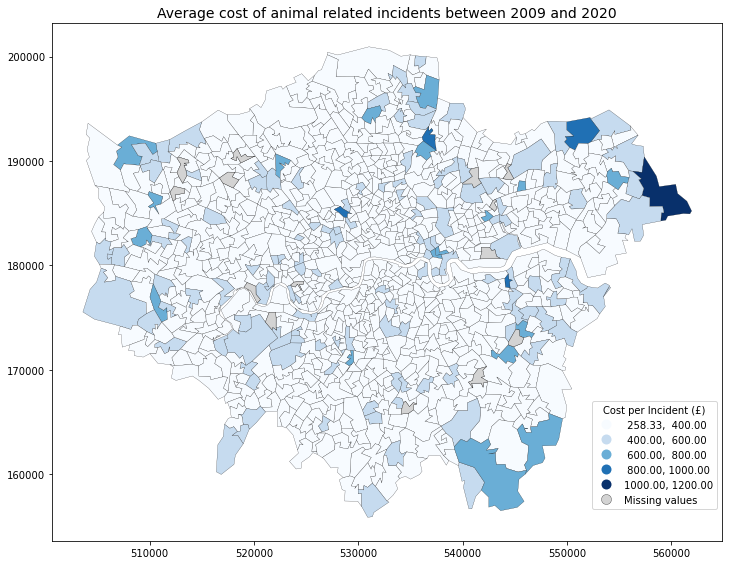

In [58]:
ax = msoa_lfb.plot(column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
                   linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
                   classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
                   missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
                   legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)

Text(0.5, 1.0, 'Average cost of animal related incidents between 2009 and 2020')

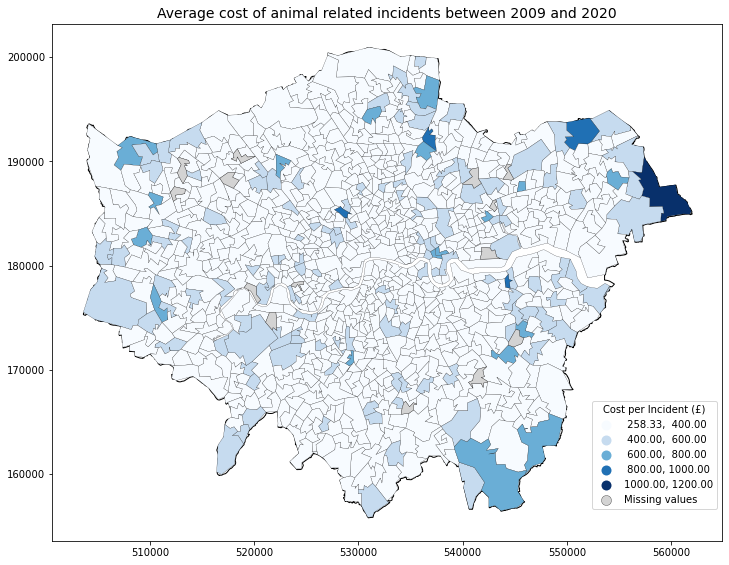

In [59]:
f, ax = plt.subplots(figsize=(12,10))
london_boundary.plot(ax=ax, color='white', edgecolor='black', linewidth = 1)
msoa_lfb.plot(ax=ax, column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
              linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
              classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
              missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
              legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)

Text(0.14, 0.148, 'Source: ONS, licensed under the open Government license v3.0')

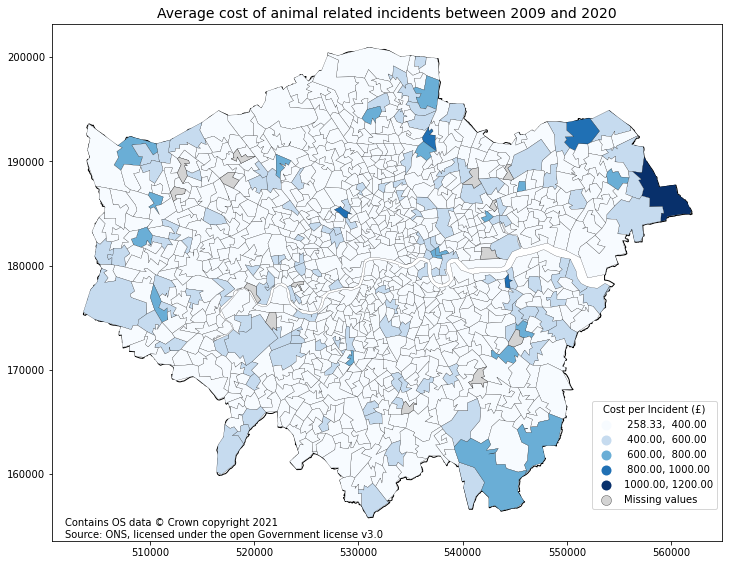

In [60]:
f, ax = plt.subplots(figsize=(12,10))
london_boundary.plot(ax=ax, color='white', edgecolor='black', linewidth = 1)
msoa_lfb.plot(ax=ax, column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
              linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
              classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
              missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
              legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)
f.text(0.14,0.165,'Contains OS data © Crown copyright 2021')
f.text(0.14,0.148, 'Source: ONS, licensed under the open Government license v3.0')

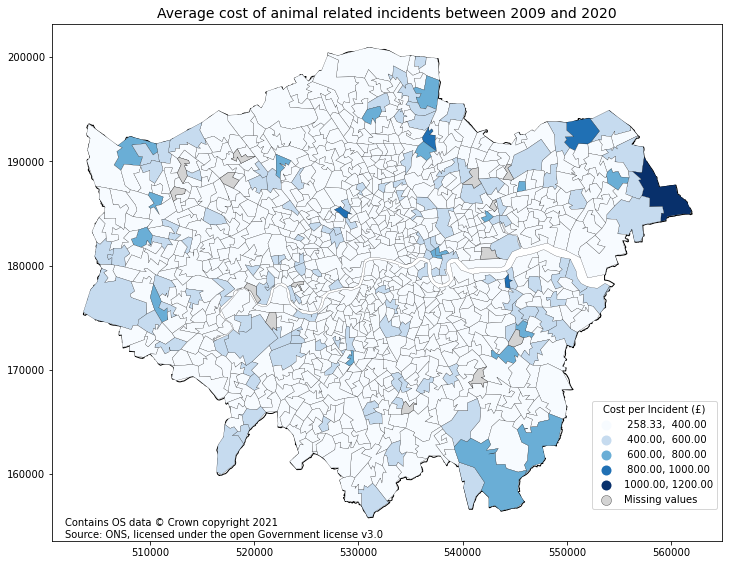

In [61]:
f, ax = plt.subplots(figsize=(12,10))
london_boundary.plot(ax=ax, color='white', edgecolor='black', linewidth = 1)
msoa_lfb.plot(ax=ax, column='cost_per_incident', cmap='Blues', edgecolor = 'k', 
              linewidth = 0.2, figsize=(12,10), scheme="User_Defined", legend=True,
              classification_kwds={'bins':[400, 600, 800, 1000, 1200]},
              missing_kwds={"color": "lightgrey", "edgecolor": "black", "linewidth": 0.3,"label": "Missing values",},
              legend_kwds={'bbox_to_anchor':(1,0.28), 'title':'Cost per Incident (£)'})
plt.title('Average cost of animal related incidents between 2009 and 2020', size = 14)
f.text(0.14,0.165,'Contains OS data © Crown copyright 2021')
f.text(0.14,0.148, 'Source: ONS, licensed under the open Government license v3.0')
plt.savefig('outputs/msoa_lfb.png', dpi = 300)